# Practicing Neural Networks with fashion MNIST


### Loading the fashion MNIST data 
The data can be found directly in the package keras (`keras.datasets.fashion_mnist`).

```python
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
# returns 4 numpy arrays: 2 training sets and 2 test sets
# images: 28x28 arrays, pixel values: 0 to 255
# labels: array of integers: 0 to 9 => class of clothings
# Training set: 60,000 images, Testing set: 10,000 images

# class names are not included, need to create them to plot the images  
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
```

In [18]:
import tensorflow as tf
from tensorflow.keras.models import Sequential        # Helper to build a network from a sequence of layers
from tensorflow.keras.layers import Dense             # Fully-connected layer
from tensorflow.keras.callbacks import EarlyStopping  # To stop training early if val loss stops decreasing

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

In [9]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

### Data Exploration

- explore the pictures and labels
- normalize the data to be between 0 and 1. Think about **why** we do this?

In [10]:
# class names are not included, need to create them to plot the images  
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [11]:
train_images.shape

(60000, 28, 28)

In [12]:
train_labels.shape

(60000,)

In [13]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [15]:
test_images.shape

(10000, 28, 28)

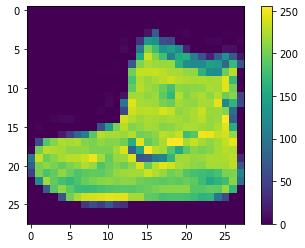

In [19]:
#Inspect the image
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [21]:
#normalize the data
train_images = train_images / 255.0

test_images = test_images / 255.0

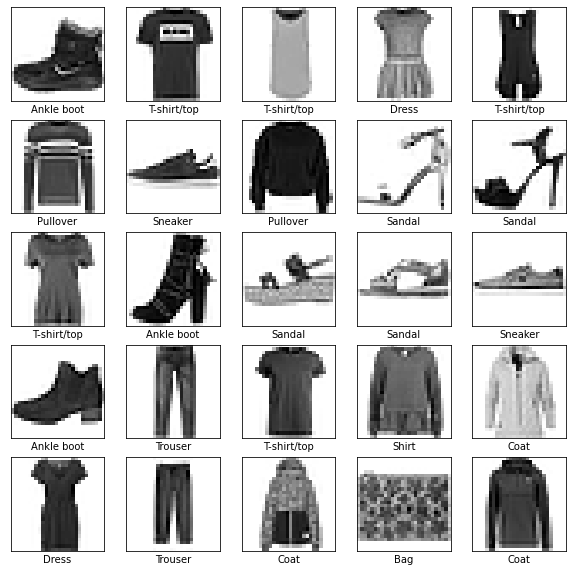

In [22]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

### Training NN model 

Step 1 - Build the architecture

Step 2 - Compile the model 

Step 3 - Train the model

Step 4 - Evaluate the model 

In [38]:
# create the model

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [39]:
# compile the model

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [41]:
# train the model

model.fit(train_images, train_labels, epochs=30, verbose=1)

Epoch 1/30
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4234 - accuracy: 0.8514
Epoch 2/30
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4175 - accuracy: 0.8530
Epoch 3/30
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4110 - accuracy: 0.8552
Epoch 4/30
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4062 - accuracy: 0.8565
Epoch 5/30
1875/1875 [==============================] - 2s 995us/step - loss: 0.4007 - accuracy: 0.8587
Epoch 6/30
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3963 - accuracy: 0.8595
Epoch 7/30
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3916 - accuracy: 0.8607
Epoch 8/30
1875/1875 [==============================] - 2s 886us/step - loss: 0.3878 - accuracy: 0.8621
Epoch 9/30
1875/1875 [==============================] - 2s 911us/step - loss: 0.3837 - accuracy: 0.8643
Epoch 10/30
1875/1875 [==============================] - 2s 937us/step - los

In [42]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3763 - accuracy: 0.8670

Test accuracy: 0.8669999837875366


In [43]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [44]:
predictions = probability_model.predict(test_images)

In [45]:
predictions[0]

array([3.0126422e-08, 1.0349199e-09, 1.8148062e-06, 2.2049476e-06,
       3.7567243e-06, 8.7336846e-02, 5.2294763e-06, 4.6101443e-02,
       3.3395526e-03, 8.6320907e-01], dtype=float32)

In [46]:
np.argmax(predictions[0])

9

In [47]:
test_labels[0]

9

In [48]:
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

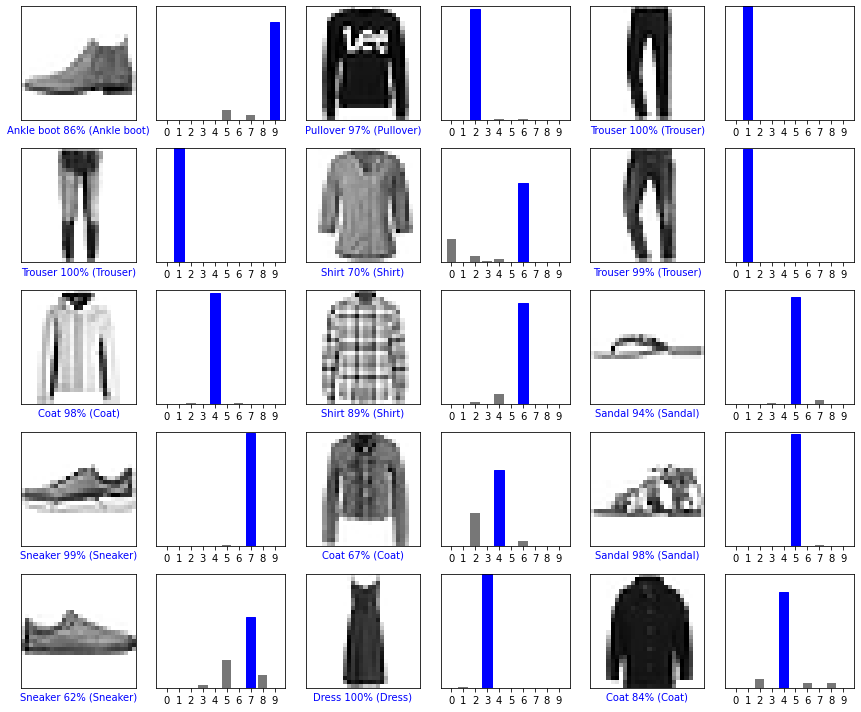

In [50]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()